In [1]:
##Import libraries
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
import keras

In [3]:
IMAGE_SIZE = 64
# Base model with MobileNetV2
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

In [4]:
base_model = keras.applications.VGG16(input_shape=IMG_SHAPE,
                                               include_top=False, 
                                               weights='imagenet')

In [5]:
base_model.trainable = False

In [6]:
# Trainable classification head
maxpool_layer = keras.layers.GlobalMaxPooling2D()
prediction_layer = keras.layers.Dense(3, activation='softmax')

In [7]:
#learning_rate = 0.0001

classifier = keras.Sequential([
    base_model,
    maxpool_layer,
    prediction_layer
])

In [8]:
classifier.compile(optimizer=keras.optimizers.Adam(),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [9]:
## data importing and transforming and scaling
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [10]:
## Scaling test data
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
## Importing training data
train_set = train_datagen.flow_from_directory('train',
                                               target_size=(64,64),
                                               batch_size=6,
                                               class_mode='categorical')

Found 132 images belonging to 3 classes.


In [20]:
train_set.class_indices

{'Camilin Marker': 0, 'Earphones': 1, 'batman Keychain': 2}

In [13]:
## Importng test data
test_set = test_datagen.flow_from_directory('test',
                                            target_size=(64, 64),
                                            batch_size=6,
                                            class_mode='categorical')

Found 47 images belonging to 3 classes.


In [14]:
## fitting model to images
classifier.fit_generator(
        train_set,
        steps_per_epoch=98,
        epochs=1,
        validation_data=test_set,
        validation_steps=38)

Epoch 1/5
98/98 [==============================] - 375s 4s/step - loss: 0.5629 - acc: 0.8503 - val_loss: 0.3268 - val_acc: 1.0000
Epoch 2/5
 5/98 [>.............................] - ETA: 5:55 - loss: 0.2076 - acc: 1.0000

KeyboardInterrupt: 

In [59]:
## prediction of single new data
import numpy as np
from keras.preprocessing import image
test_image= image.load_img('test/batman Keychain/IMG_20190522_115408_014.jpg'
                           ,target_size =(64,64))

#marker Camilin Marker/IMG_20190522_115308_014.jpg
#earphone     Earphones/IMG_20190522_115610_014.jpg
#keychain     batman Keychain/IMG_20190522_115408_014.jpg   

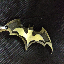

In [60]:
test_image

In [61]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [62]:
## For single prediction change the dimension using axis. To remove problem of batch
test_image = np.expand_dims(test_image,axis = 0)
result = classifier.predict(test_image)

In [63]:
result=result.argmax()

In [64]:
## print label

if result == 0:
    prediction = 'Marker'
elif result == 1:
    prediction = 'Earphones'
else:
    prediction = 'Keychain'
    

In [65]:
prediction

'Keychain'